# Business Understanding

The core business of a financial institution can be broadly classified as 
1. Lending
2. Borrowing. 

Lending generates revenue to the bank in the form of interest from customers with a certain degree of default risk involved. 

Borrowing, or rather attracting public’s savings into the bank is another source of revenue generation, which can be less risky than the former. Every bank offers term deposits to its customers from short-term to long-term time periods. For example, Kotak Mahindra Bank offers the following:

```
Get attractive returns on surplus funds for your organization. A tenure ranging from 7 days to 7 years provides you a wide range of investment options to suit your treasury needs.

Highlights and Features:
1. Our guaranteed fixed interest rates for a nominated term mean you know exactly what your investment is worth. It’s a secure option to let your money grow.
2. Loan facility to the extent of 85% of principal on a term deposit.
3. Attractive interest rates along with automatic rollovers to fuel your business ambitions and propel you towards long-term success.
```



# Data Understanding

The following features are present within the dataset:

1. id	Unique identifier for each sample in the dataset. Cannot be used for modelling
2. customer_age	Age of the Customer in years
3. job_type	Type of job of the customer
4. marital	Marital Status of the Custmer
5. education	Education Level of the Customer
6. default	Whether customer has Defaulted in Past
7. balance	Current Balance in the Customer's Bank
8. housing_loan	Has customer taken a Housing Loan
9. personal_loan	Has customer taken a Personal Loan
10. communication_type	Type of communication made by the bank with the customer
11. day_of_month	Day of month of the last contact made with customer
12. month	Month for the last contact made with customer
13. last_contact_duration	Last Contact duration made with the customer (in seconds)
14. num_contacts_in_campaign	Number of contacts made with the customer during the current campaign.
15. days_since_prev_campaign_contact	Number of days passed since customer was contacted in previous campaign.
16. num_contacts_prev_campaign	Number of contacts made with the customer during the previous campaign.
17. prev_campaign_outcome	Success or Failure in previous Campaign.
18. term_deposit_subscribed	(Target) Has the customer taken a term deposit ?



In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import random
from scipy import stats


from sklearn.model_selection import train_test_split, KFold, StratifiedShuffleSplit,StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import FeatureUnion
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, KFold,  StratifiedShuffleSplit
from tqdm.notebook import tqdm ,tnrange
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [6]:
data = pd.read_csv("Bank Data.csv")


In [7]:
data.shape

(31647, 18)

In [8]:
data

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,id_27290,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,99.0,2.0,265.0,3,other,0
31643,id_20428,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,31.0,7.0,NaN,0,unknown,0
31644,id_44679,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,89.0,2.0,NaN,0,unknown,0
31645,id_4841,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,216.0,6.0,NaN,0,unknown,0


In [9]:

data.shape

(31647, 18)

In [10]:
def display_data(df):
  display(df.head())
  print("================")
  display(df.tail())
  print("================")
  print(df.shape)
display_data(data)

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0


,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
31642,id_27290,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,99.0,2.0,265.0,3,other,0
31643,id_20428,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,31.0,7.0,NaN,0,unknown,0
31644,id_44679,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,89.0,2.0,NaN,0,unknown,0
31645,id_4841,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,216.0,6.0,NaN,0,unknown,0
31646,id_1723,38.0,technician,single,tertiary,no,1045.0,no,no,cellular,18,aug,183.0,10.0,NaN,0,unknown,0


(31647, 18)


In [11]:
# Segregating Numerical and Categorical Columns

col_id = 'id'
col_y = 'term_deposit_subscribed'
features = [c for c in data.columns if c not in [col_id, col_y, ]]
display(features)
cat_cols = data.select_dtypes(include=['object'])

# categorical variables
cat_cols = [c for c in features if c in cat_cols]
# numerical variables
num_cols = [n for n in features if n not in cat_cols]

display(cat_cols)
display(num_cols)

['customer_age',
 'job_type',
 'marital',
 'education',
 'default',
 'balance',
 'housing_loan',
 'personal_loan',
 'communication_type',
 'day_of_month',
 'month',
 'last_contact_duration',
 'num_contacts_in_campaign',
 'days_since_prev_campaign_contact',
 'num_contacts_prev_campaign',
 'prev_campaign_outcome']

['job_type',
 'marital',
 'education',
 'default',
 'housing_loan',
 'personal_loan',
 'communication_type',
 'month',
 'prev_campaign_outcome']

['customer_age',
 'balance',
 'day_of_month',
 'last_contact_duration',
 'num_contacts_in_campaign',
 'days_since_prev_campaign_contact',
 'num_contacts_prev_campaign']

<AxesSubplot:xlabel='term_deposit_subscribed', ylabel='count'>

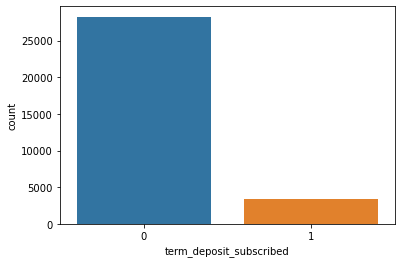

In [12]:
sns.countplot(data["term_deposit_subscribed"])

We can observe that the dataset is highly imbalanced with the number of people not interested to subscribe to term deposits being very high compared to the number of subscribers. 

Therefore, we have to handle this class imbalance in order to make sure that there is no impact of the same on our model or else the generalization ability of the model on unseen data stands decreased.

We will try to explore the other features now.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

In [15]:
data.isna().sum()

id                                      0
customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64

In [16]:
data.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed
count,31028.000000,31248.000000,31647.000000,31336.000000,31535.000000,5816.000000,31647.000000,31647.000000
mean,40.439216,1368.112615,15.818561,256.184038,2.776629,224.995186,0.591620,0.107246
std,10.751392,3085.342417,8.322970,256.181479,3.153293,114.991828,2.499675,0.309430
min,18.000000,-8020.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,32.000000,72.000000,8.000000,103.000000,1.000000,133.000000,0.000000,0.000000
50%,39.000000,449.000000,16.000000,179.000000,2.000000,195.000000,0.000000,0.000000
75%,48.000000,1413.000000,21.000000,315.250000,3.000000,329.000000,0.000000,0.000000
max,97.000000,102128.000000,31.000000,4900.000000,63.000000,871.000000,275.000000,1.000000


The mean age is 40 years with minimum and maximum values of age being 18 and 97 respectively and the mean balance is INR 1368 with a standard deviation of INR 3085 which is a large number indicating that the balance is spread equitably across the data.

The mean and standard deviation of previous call duration is almost equal meaning that there are a high number of observations below (Mean - Standard Deviation) which is equivalent to zero.

In [17]:
data.corr(method='spearman')

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed
customer_age,1.000000,0.096030,-0.011817,-0.028291,0.035721,-0.086946,-0.015934,-0.002264
balance,0.096030,1.000000,0.000056,0.046502,-0.032744,-0.195038,0.078269,0.102610
day_of_month,-0.011817,0.000056,1.000000,-0.060713,0.141868,-0.078041,-0.090589,-0.028038
last_contact_duration,-0.028291,0.046502,-0.060713,1.000000,-0.106468,-0.045599,0.034811,0.349805
num_contacts_in_campaign,0.035721,-0.032744,0.141868,-0.106468,1.000000,0.079172,-0.109158,-0.080196
days_since_prev_campaign_contact,-0.086946,-0.195038,-0.078041,-0.045599,0.079172,1.000000,-0.104169,-0.195221
num_contacts_prev_campaign,-0.015934,0.078269,-0.090589,0.034811,-0.109158,-0.104169,1.000000,0.177729
term_deposit_subscribed,-0.002264,0.102610,-0.028038,0.349805,-0.080196,-0.195221,0.177729,1.000000


The last contact duration, customer balance and number of contacts in the previous campaign are positively correlated with the term deposit subscription status. However, only last contact duration has a significant correlation.

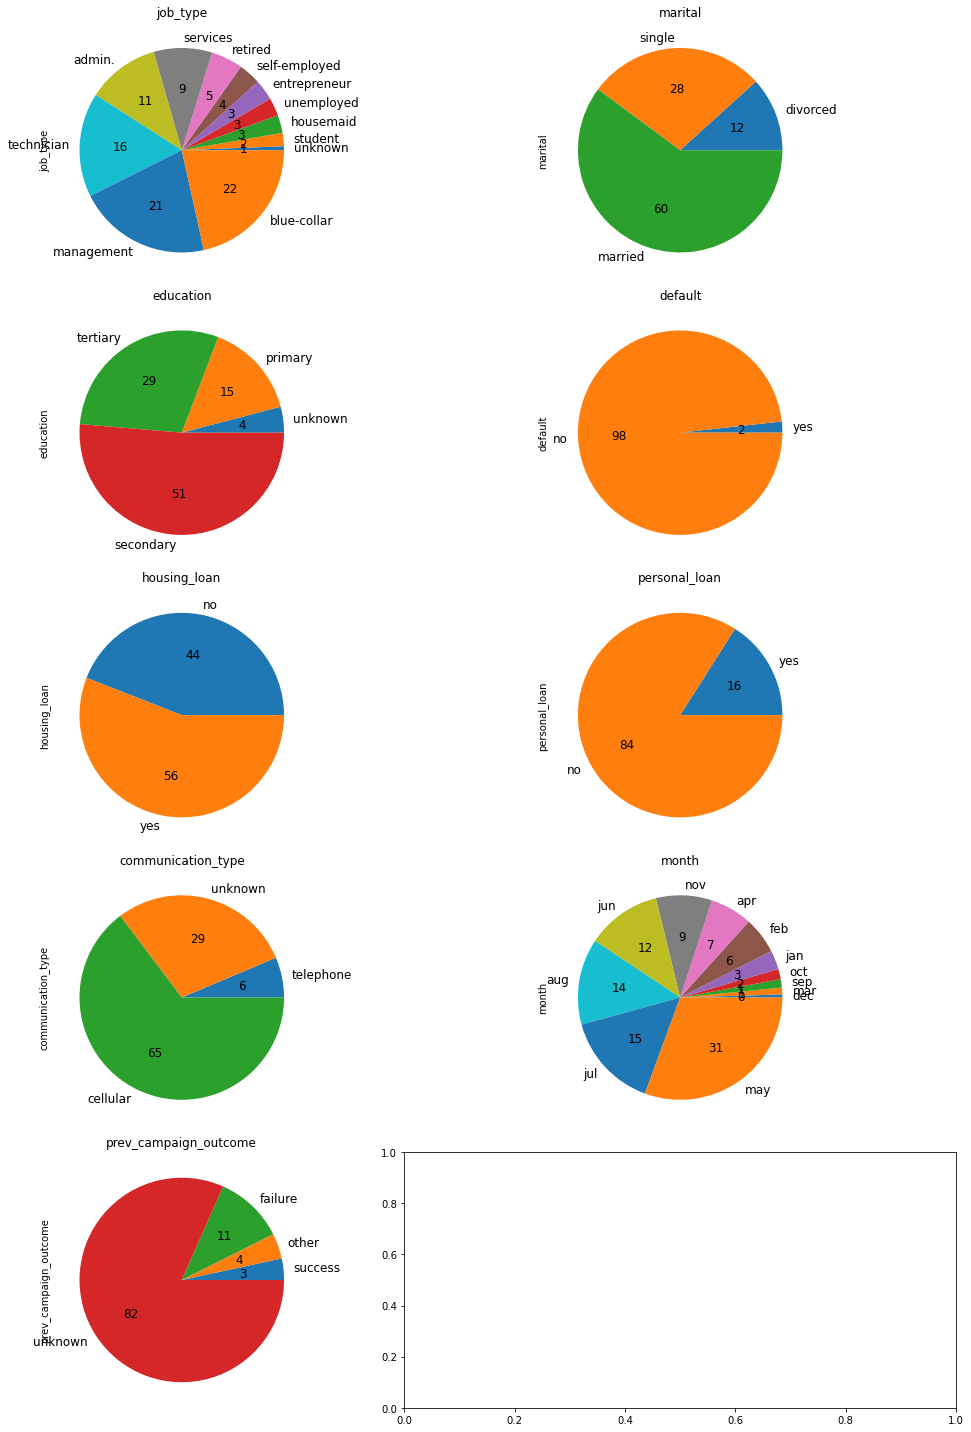

In [18]:
def pie_chart(data, list_of_cols):
    fig, axes = plt.subplots(5,2, figsize=(15,20))
    axes = [ax for axes_row in axes for ax in axes_row]
    
    for i, c in enumerate(data[list_of_cols]):
        _ = data[c].value_counts()[::-1].plot(kind='pie',ax=axes[i], title=c, 
                                              autopct="%.0f", fontsize=12)
        _ = axes[i].set_label('')
        _ = plt.tight_layout()
pie_chart(data, cat_cols)

The following observations can be made on the data:
1. Management, Blue Collar and Technicians are the top 3 preferred job types in the data.
2. 60 percent of the people in the data are married and 28 percent of them are single.
3. Half of the people within the data have completed secondary education.
4. Only 2 percent of the people within data are defaulters.
5. Nearly half of the people have a housing loan and other half does not have any loan.
6. Only 16% of the people within data are having personal loan.
7. 65% of the people use cellular communication.
8. The months of May and July have maximum number of entries within data.
9. 11% of the previous campaign outcome is a failure, only 3% has been successful and 82% people do not have any data associated with it.

Based on our observations, we can create the following hypotheses:
1. Blue Collar job type persons are more likely to subscribe to term deposits than other jobs.
2. Married people are more likely to buy term deposits.
3. The people with secondary education have higher investments in term deposits.
4. The people who are defaulters are more likely to not buy term deposits.
5. People with no housing loan have more money to buy term deposits.
6. The people with personal loan are more likely to buy term deposits as they have more incentive to save.
7. May is the best month to advertise term deposits.

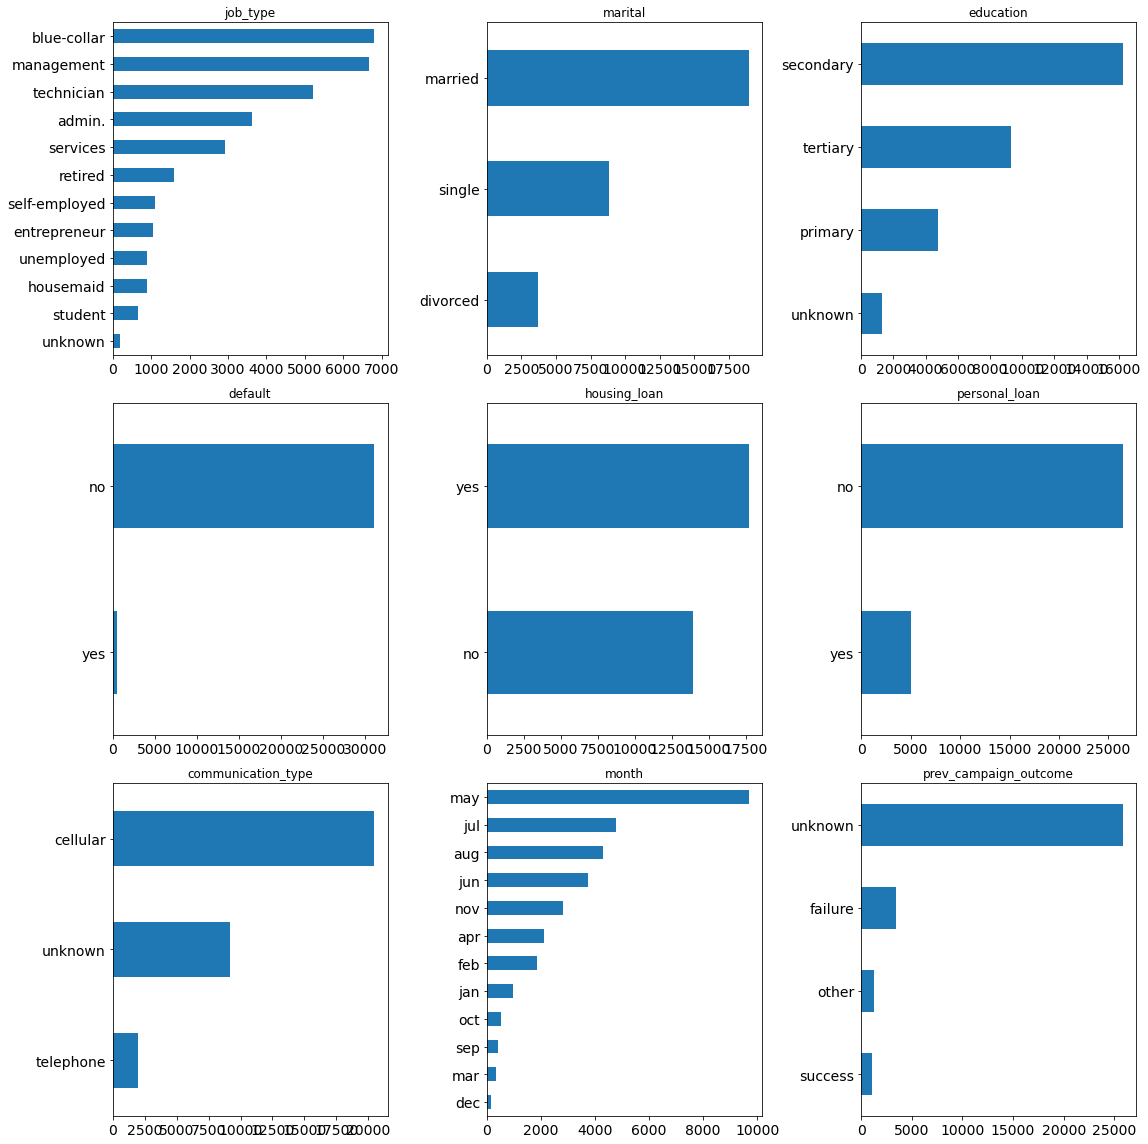

In [19]:
def univariate_count(data, list_of_cols):
    fig, axes = plt.subplots(3, 3, figsize=(16, 16))
    axes = [ax for axes_row in axes for ax in axes_row]

    for i, c in enumerate(data[list_of_cols]):
        _ = data[c].value_counts()[::-1].plot(kind = 'barh', ax=axes[i], title=c, fontsize=14)
    
    _ = plt.tight_layout()

univariate_count(data, cat_cols)

Distribution of  customer_age
Skewness : 0.6619530687835736, Kurtosis : 0.3076691370191873


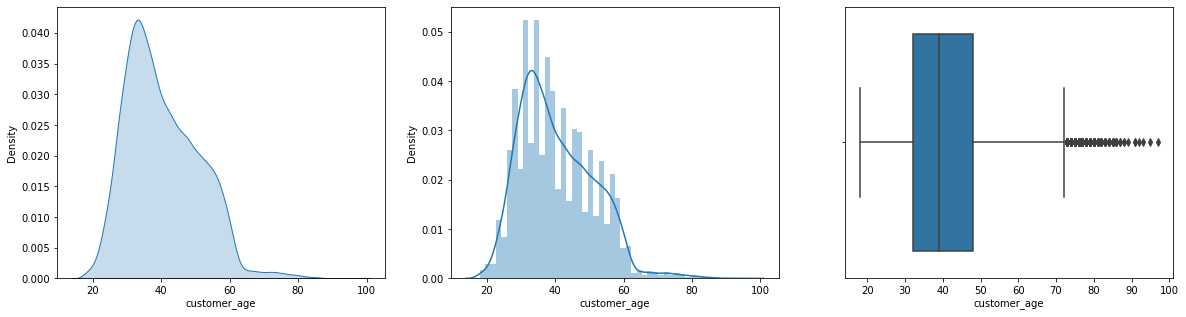

Distribution of  balance
Skewness : 8.505127273489762, Kurtosis : 146.60205620975043


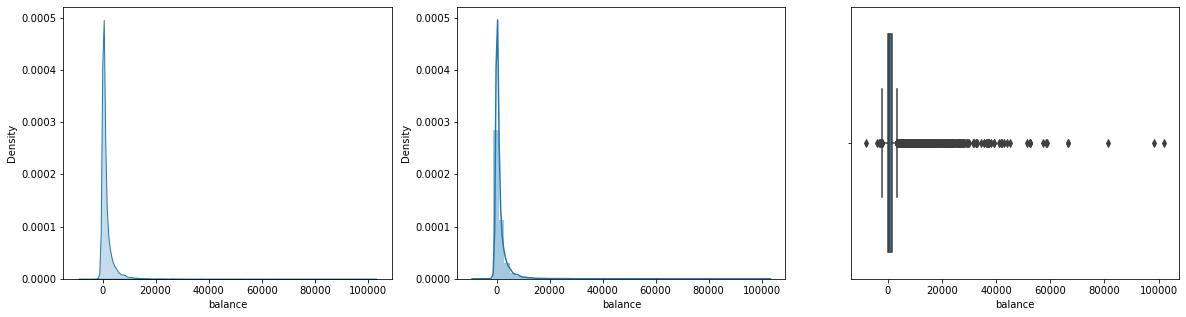

Distribution of  day_of_month
Skewness : 0.09190899020750912, Kurtosis : -1.0572565335971313


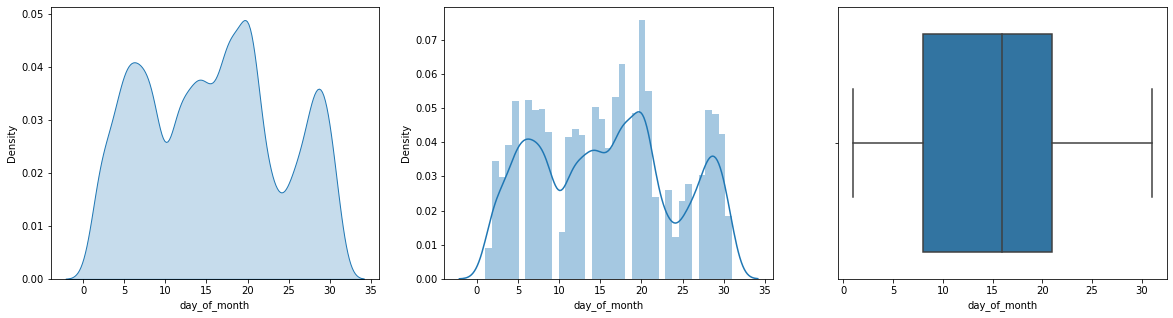

Distribution of  last_contact_duration
Skewness : 3.1658690138459744, Kurtosis : 18.7692018551595


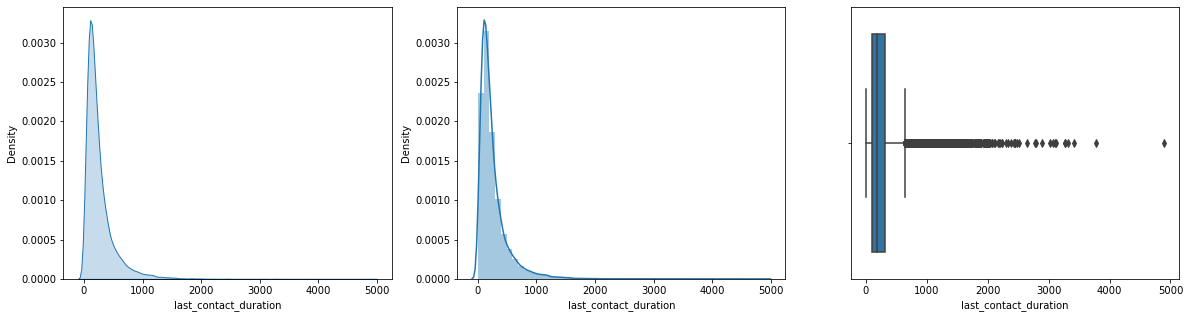

Distribution of  num_contacts_in_campaign
Skewness : 5.000171590168278, Kurtosis : 40.890576781894886


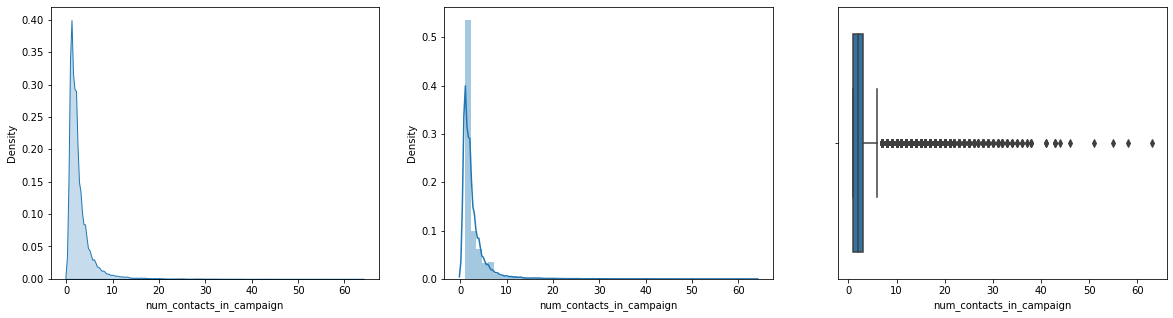

Distribution of  days_since_prev_campaign_contact
Skewness : 0.649478076491197, Kurtosis : 1.3280727655989595


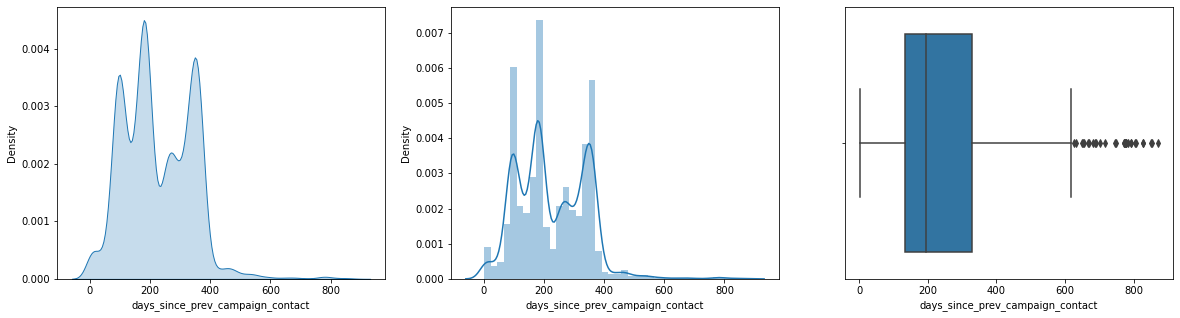

Distribution of  num_contacts_prev_campaign
Skewness : 45.83300679544707, Kurtosis : 4635.241369401592


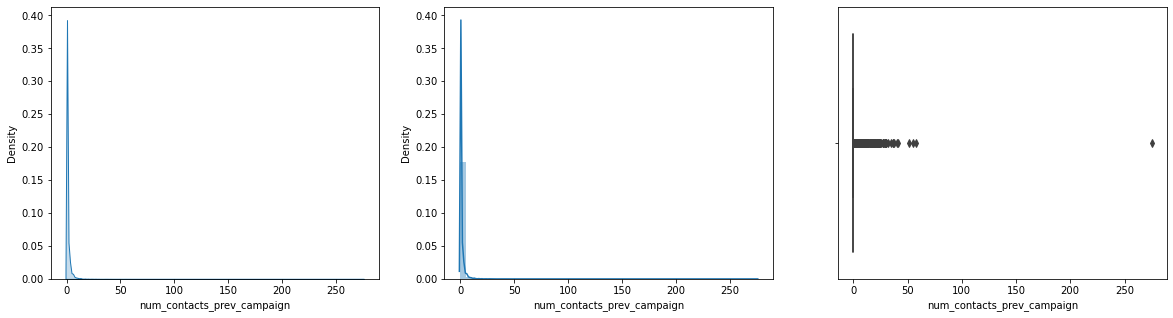

In [20]:
def data_distribution(data, feature):
    
    plt.figure(figsize = (20,5))
    print("Distribution of ", feature)
    plt.subplot(1,3,1)
    sns.kdeplot(data[feature], shade=True)

    plt.subplot(1,3,2)
    sns.distplot(data[feature])

    plt.subplot(1,3,3)
    sns.boxplot(data[feature], orient = 'vertical')

    print("Skewness : {}, Kurtosis : {}".format(data[feature].skew(), data[feature].kurtosis()))
    plt.show()
for i in num_cols:
  data_distribution(data, i)

We can make the following observations from the data:
1. Customer Age is right skewed and Kurtosis is 0.3 which is less than 3 and hence it is a platykurtic distribution.
Kurtosis is a measure of whether the distribution is too peaked (a very narrow distribution with most of the responses in the center) and the value between 1 and -1 is acceptable as a rule of thumb. However, anything above 3 and lower than -3 are alarming and needs to be handled.
2. Balance is highly right skewed with Kurtosis=133 which means it is Leptokurtic Distribution (Kurtosis>3) which is extremely high and we will have to handle this.
3. The Day of the month is equally spread and we cannot make anything out of the distribution.

Other features are as it is very small in value and it is justified to have such observational values.

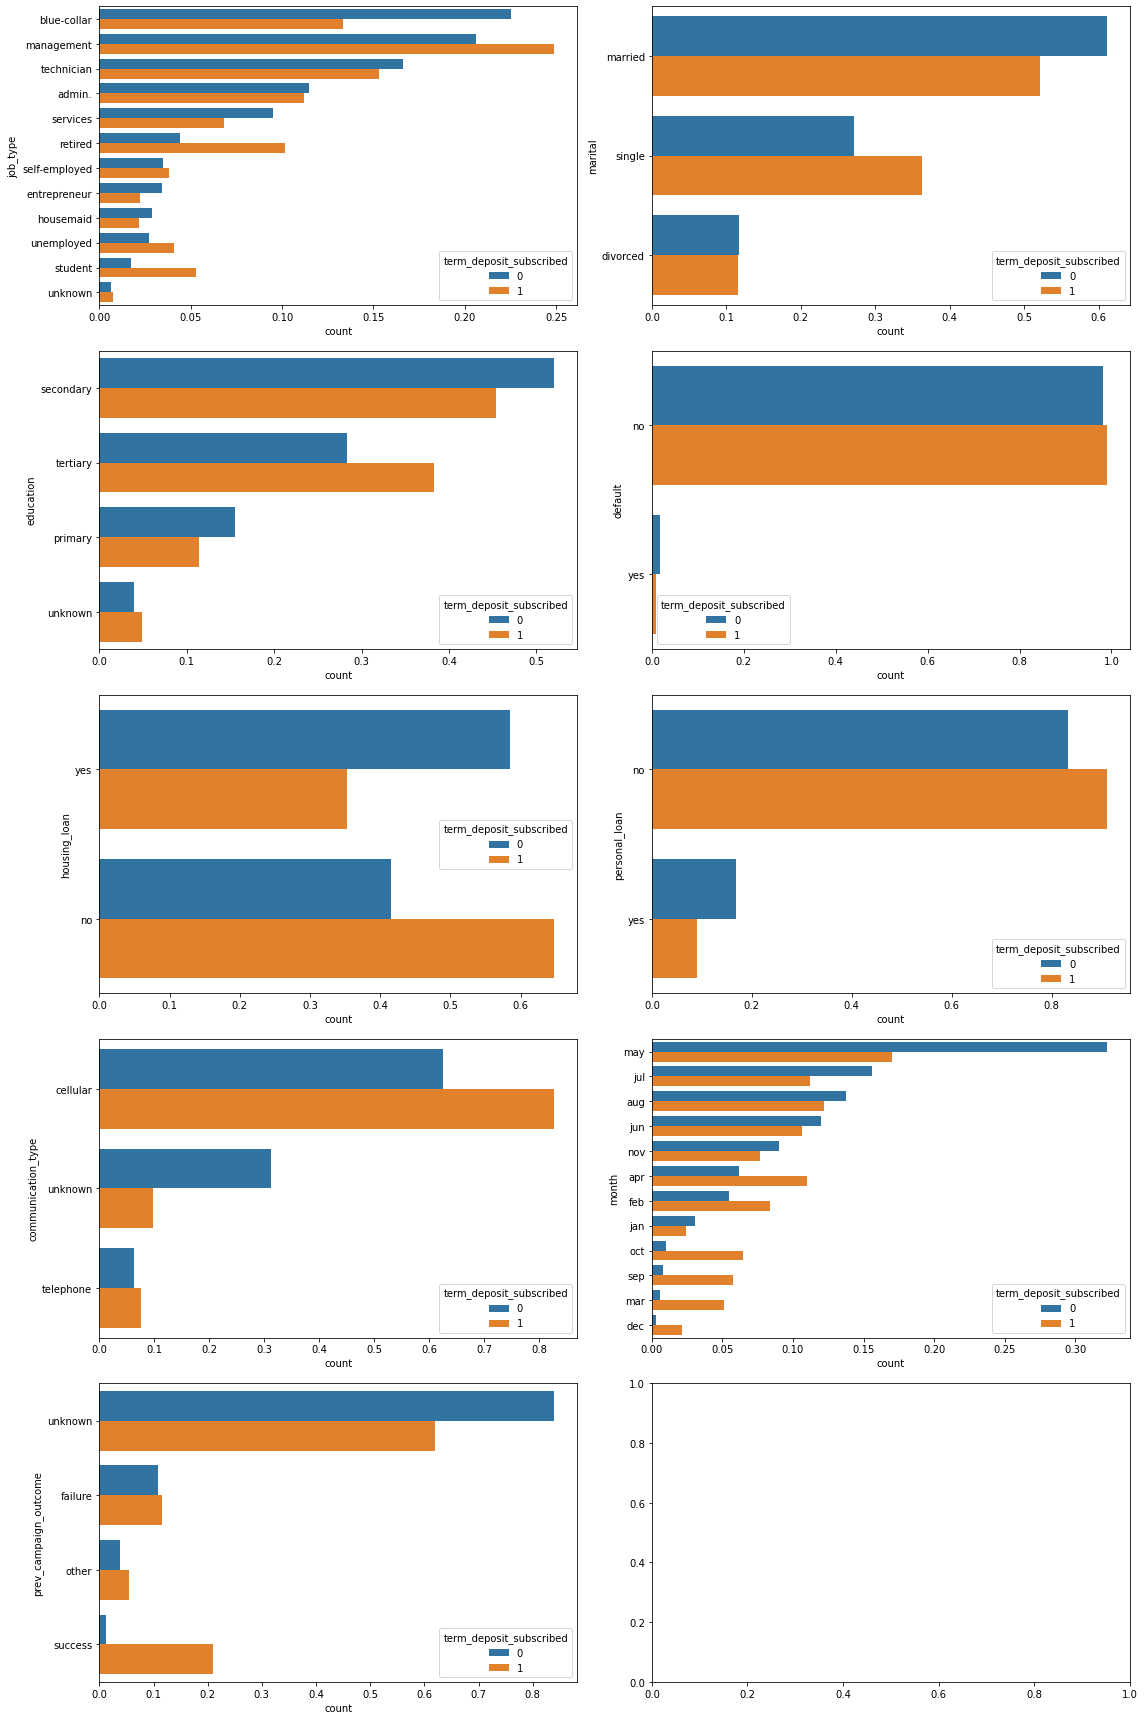

In [21]:
def bivariate_count(data, list_of_cols, target):
    fig, axes = plt.subplots(5, 2, figsize=(16, 24))
    axes = [ax for axes_row in axes for ax in axes_row]

    for i, c in enumerate(data[list_of_cols]):
        fltr = data[target] == 0
        vc_a = data[fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

        vc_b = data[~fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

        vc_a[target] = 0
        vc_b[target] = 1

        df = pd.concat([vc_a, vc_b]).reset_index(drop = True)

        _ = sns.barplot(y = c, x = 'count', data =df , hue=target, ax=axes[i])
    
    _ = plt.tight_layout()
bivariate_count(data, cat_cols, col_y)

Based on our bivariate analysis, we will revisit our hypotheses. Reiterating the initial hypotheses based on univariate analysis:

1. Blue Collar job type persons are more likely to subscribe to term deposits than other jobs.
2. Married people are more likely to buy term deposits.
3. The people with secondary education have higher investments in term deposits.
4. The people who are defaulters are more likely to not buy term deposits.
5. People with no housing loan have more money to buy term deposits.
6. The people with personal loan are more likely to buy term deposits as they have more incentive to save.
7. May is the best month to advertise term deposits.

Let us try to evaluate further with bivariate analysis on the features to understand these hypotheses.

1. Technicians and management job types are more interested to invest in term deposits. Hence, our assumption that the blue collar job type is more interested in term deposits than others is incorrect.
2. There are more number of married people who are not interested in investing into term deposits, and singles are more interested in term deposit investments. Thus, our assumption of married people more interested in term deposits is also wrong.
3. Tertiary sector people are more interested into investing into term deposits.
4. There are almost equal number of defaulters and non-defaulters interested in investing as much as not interested in it. Thus, it is more of a uniform feature and our assumption is wrong.
5. People without housing loan are more interested in term deposits.
6. People without personal loans are more interested in term deposits.

Hence, in general we can say loan is negatively associated with term deposit susbcription.

7. There are more number of people not interested in term deposits in May than other months. Hence, our assumption is wrong. March, September, October, April and February are the months where people are more interested to invest into term deposit subscriptions.

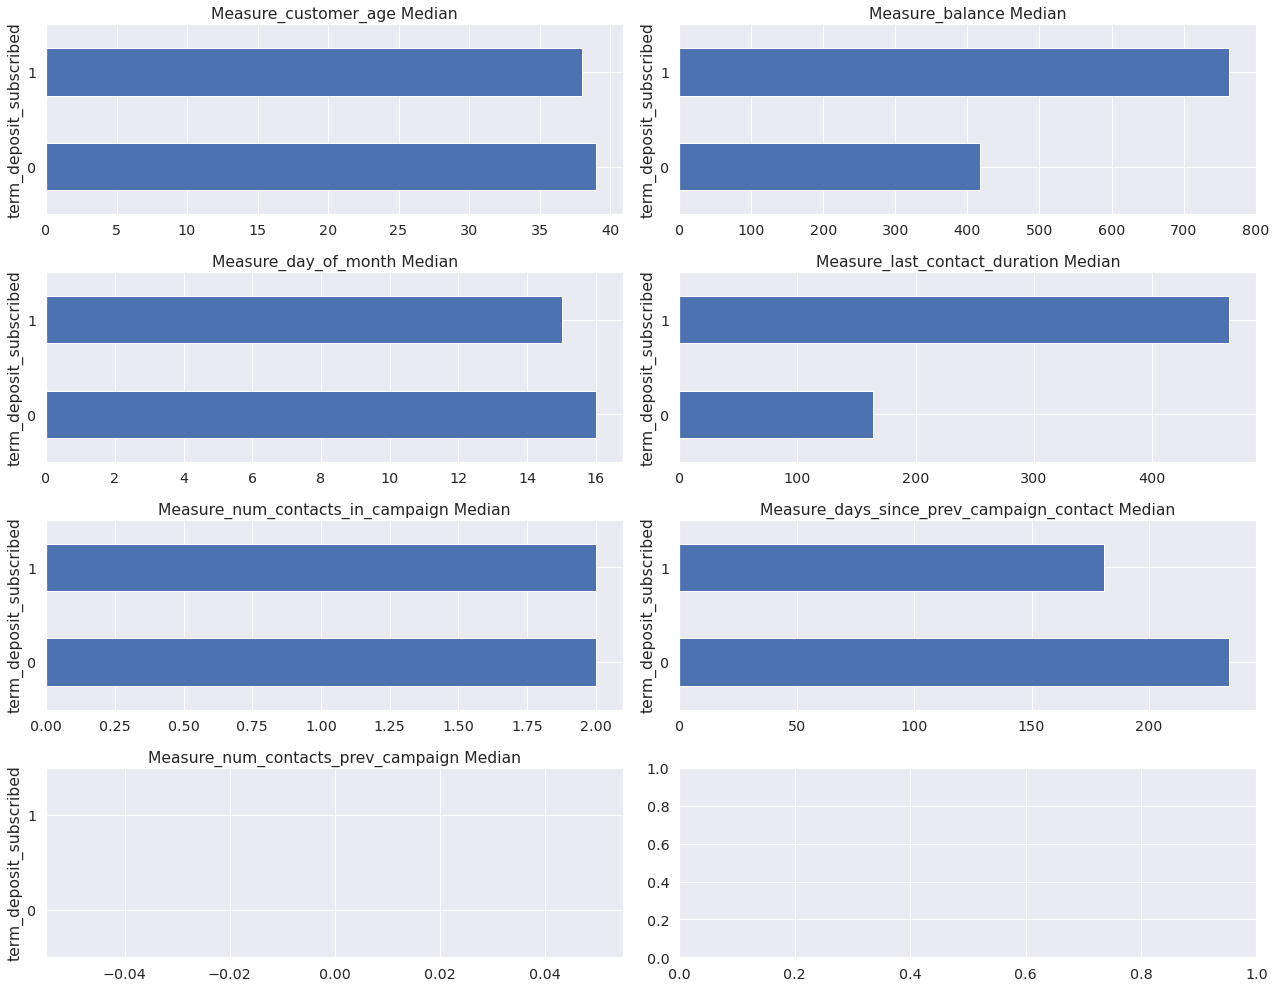

In [25]:
def median_target_comparison(data, target, list_of_cols):
    sns.set(font_scale=1.3)
    fig, axes = plt.subplots(4, 2, figsize=(18, 14))
    axes = [ax for axes_row in axes for ax in axes_row]
    for i, c in enumerate(list_of_cols):
      plot = data.groupby(target)[c].median().plot(kind = 'barh', title=f'Measure_{c} Median', ax=axes[i])
    plt.tight_layout()
median_target_comparison(data, 'term_deposit_subscribed', num_cols)

<AxesSubplot:title={'center':'Median_last_contact_duration'}, ylabel='term_deposit_subscribed'>

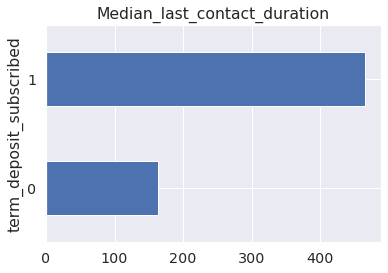

In [26]:
data.groupby(col_y)['last_contact_duration'].median().plot(kind = 'barh', title=f'Median_last_contact_duration')

In [27]:
data.loc[data['job_type']=='unknown']

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
69,id_19178,55.0,unknown,married,primary,no,10.0,no,no,telephone,19,oct,258.0,2.0,NaN,0,unknown,0
280,id_6035,64.0,unknown,married,unknown,no,2795.0,no,no,telephone,9,sep,375.0,4.0,NaN,0,unknown,0
832,id_20033,60.0,unknown,married,unknown,no,1504.0,no,no,cellular,16,nov,295.0,1.0,104.0,2,failure,0
853,id_6089,54.0,unknown,married,tertiary,no,-2.0,no,no,unknown,16,may,410.0,3.0,NaN,0,unknown,0
862,id_10406,47.0,unknown,married,primary,no,40.0,no,no,unknown,11,jun,91.0,1.0,NaN,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30801,id_12771,56.0,unknown,married,unknown,no,64.0,no,no,cellular,2,apr,279.0,1.0,NaN,0,unknown,1
31105,id_1223,26.0,unknown,single,secondary,no,1184.0,no,no,unknown,17,nov,34.0,1.0,NaN,0,unknown,0
31327,id_13575,31.0,unknown,single,primary,no,47.0,yes,no,unknown,7,may,35.0,2.0,NaN,0,unknown,0
31411,id_1853,60.0,unknown,married,unknown,no,3939.0,no,no,unknown,5,jun,46.0,2.0,NaN,0,unknown,0


Only 199 people are present without any jobs in the data

Only about 25 people without job are investing in term deposit that can be a potential outlier

In [28]:
data.loc[(data['job_type']=='unknown') & (data['term_deposit_subscribed']==1.0)]

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
1791,id_1201,41.0,unknown,single,unknown,no,941.0,no,no,cellular,22,apr,204.0,1.0,NaN,0,unknown,1
3878,id_2014,79.0,unknown,married,unknown,no,2230.0,no,no,telephone,14,apr,310.0,3.0,NaN,0,unknown,1
4733,id_24424,28.0,unknown,single,secondary,no,4468.0,no,no,cellular,28,jan,758.0,1.0,NaN,0,unknown,1
6272,id_10408,79.0,unknown,married,unknown,no,395.0,no,no,telephone,7,may,283.0,3.0,NaN,0,unknown,1
7154,id_26179,26.0,unknown,single,secondary,no,1186.0,no,no,telephone,26,feb,248.0,1.0,101.0,1,failure,1
9689,id_20317,26.0,unknown,single,unknown,no,329.0,no,no,cellular,22,feb,314.0,1.0,NaN,0,unknown,1
12212,id_24460,42.0,unknown,married,tertiary,no,401.0,no,no,cellular,7,sep,333.0,1.0,NaN,0,unknown,1
13852,id_1014,61.0,unknown,married,unknown,no,17294.0,no,no,cellular,26,aug,645.0,11.0,NaN,0,unknown,1
14939,id_30067,48.0,unknown,married,primary,no,344.0,yes,yes,cellular,20,apr,682.0,4.0,340.0,2,success,1
17196,id_9728,32.0,unknown,married,secondary,no,339.0,no,no,cellular,4,feb,878.0,2.0,177.0,7,failure,1


Only 223 people with negative balances are buying term deposits and very few people with "Unknown" occupation have bought term deposits.
Hence, we can filter out the unknown occupation people since they are outliers within the data and also makes business sense.

In [29]:
data.loc[(data['balance']<0) & (data['term_deposit_subscribed']==1.0)]

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
199,id_8234,33.0,technician,single,secondary,yes,-483.0,yes,no,cellular,17,apr,1065.0,1.0,NaN,0,unknown,1
286,id_15172,56.0,blue-collar,married,primary,no,-544.0,no,no,cellular,25,aug,1170.0,6.0,NaN,0,unknown,1
378,id_19867,47.0,technician,divorced,secondary,no,-4.0,no,no,cellular,29,sep,165.0,1.0,120.0,2,failure,1
805,id_847,65.0,self-employed,married,tertiary,no,-40.0,no,no,cellular,1,apr,380.0,2.0,NaN,0,unknown,1
830,id_40577,42.0,technician,married,tertiary,no,-4.0,no,no,cellular,4,aug,1501.0,2.0,NaN,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30727,id_27365,38.0,management,married,tertiary,no,-5.0,no,no,telephone,27,aug,646.0,9.0,NaN,0,unknown,1
30811,id_40947,54.0,technician,married,secondary,no,-4.0,no,no,telephone,5,feb,754.0,3.0,NaN,0,unknown,1
31297,id_28348,31.0,services,single,primary,no,-3.0,yes,yes,cellular,19,nov,685.0,1.0,NaN,0,unknown,1
31337,id_33540,55.0,technician,married,secondary,no,-318.0,no,yes,cellular,10,jul,2020.0,1.0,NaN,0,unknown,1


In [30]:
print(data.shape)
final = data.drop(data.loc[data["job_type"]=="unknown"].index)
final.shape

(31647, 18)


(31448, 18)

Very few people about only 30 people with zero balance have bought term deposits, however they will not be able to buy any other term deposits. Similarly, people with negative balance also cannot buy term deposits and can be filtered out of the data removing 248 more such outliers (term deposit susbcription=1) and a total of 3944 rows

In [31]:
final.loc[(final['balance']<=0) & (final['term_deposit_subscribed']==0.0)]

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
17,id_31616,41.0,technician,married,secondary,no,-3.0,yes,no,cellular,16,apr,138.0,1.0,300.0,1,failure,0
18,id_17398,41.0,services,married,secondary,no,-145.0,no,yes,unknown,6,jun,201.0,1.0,NaN,0,unknown,0
19,id_32668,53.0,retired,divorced,secondary,yes,-204.0,no,yes,unknown,6,jun,176.0,1.0,NaN,0,unknown,0
32,id_20948,37.0,management,married,secondary,no,0.0,no,no,cellular,12,aug,126.0,2.0,NaN,0,unknown,0
36,id_1993,36.0,admin.,married,secondary,no,-327.0,yes,no,cellular,29,jul,117.0,8.0,NaN,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31594,id_11363,42.0,technician,married,secondary,no,-247.0,no,yes,unknown,26,may,68.0,1.0,NaN,0,unknown,0
31596,id_11156,47.0,technician,married,secondary,no,-58.0,yes,no,cellular,16,apr,178.0,2.0,NaN,0,unknown,0
31603,id_28135,42.0,blue-collar,married,secondary,no,-103.0,yes,no,unknown,6,may,94.0,2.0,NaN,0,unknown,0
31619,id_3529,54.0,blue-collar,divorced,primary,yes,-2.0,no,no,cellular,18,jul,307.0,3.0,NaN,0,unknown,0


In [32]:
print(final.shape)
final = final.drop(final.loc[final['balance']<=0].index)
final.shape

(31448, 18)


(27256, 18)

<AxesSubplot:xlabel='balance', ylabel='Density'>

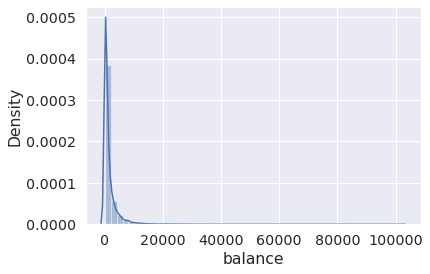

In [33]:
sns.distplot(final["balance"])

In [34]:
data.loc[(data['balance']<0) & (data['job_type']=='retired')]

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
19,id_32668,53.0,retired,divorced,secondary,yes,-204.0,no,yes,unknown,6,jun,176.0,1.0,NaN,0,unknown,0
243,id_1029,61.0,retired,married,tertiary,no,-5.0,no,no,cellular,25,aug,106.0,3.0,NaN,0,unknown,0
267,id_20716,54.0,retired,divorced,secondary,no,-57.0,no,yes,cellular,15,jul,353.0,10.0,NaN,0,unknown,0
406,id_41371,59.0,retired,married,primary,no,-3.0,no,no,unknown,18,jun,92.0,1.0,NaN,0,unknown,0
485,id_41284,55.0,retired,married,primary,no,-2.0,no,no,cellular,30,jan,122.0,4.0,NaN,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30452,id_18082,61.0,retired,divorced,unknown,no,-48.0,yes,no,cellular,29,jan,169.0,1.0,261.0,2,failure,0
30543,id_23182,50.0,retired,divorced,primary,no,-25.0,no,yes,cellular,14,jul,329.0,3.0,NaN,0,unknown,0
31019,id_41921,58.0,retired,married,secondary,no,-325.0,yes,no,cellular,7,may,228.0,2.0,NaN,0,unknown,0
31466,id_35133,61.0,retired,married,secondary,no,-3.0,no,no,cellular,25,aug,75.0,2.0,NaN,0,unknown,0


In [35]:
data.loc[(data["term_deposit_subscribed"]==1.0) & (data["marital"]=="divorced") & (data["balance"]<0)]

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
378,id_19867,47.0,technician,divorced,secondary,no,-4.0,no,no,cellular,29,sep,165.0,1.0,120.0,2,failure,1
2431,id_914,32.0,blue-collar,divorced,unknown,yes,-277.0,yes,yes,cellular,17,apr,698.0,2.0,329.0,2,failure,1
2818,id_26474,30.0,admin.,divorced,secondary,no,-239.0,no,yes,unknown,27,jun,849.0,2.0,NaN,0,unknown,1
4570,id_5608,57.0,retired,divorced,secondary,no,-635.0,yes,no,cellular,15,may,568.0,1.0,NaN,0,unknown,1
4588,id_24226,57.0,blue-collar,divorced,primary,no,-6.0,yes,yes,cellular,8,may,738.0,1.0,NaN,0,unknown,1
5300,id_42707,42.0,services,divorced,secondary,no,-368.0,yes,no,cellular,5,may,890.0,1.0,NaN,0,unknown,1
5647,id_10858,43.0,blue-collar,divorced,primary,no,-212.0,no,no,cellular,15,jul,882.0,2.0,NaN,0,unknown,1
6715,id_27649,37.0,management,divorced,tertiary,no,-44.0,yes,no,cellular,14,may,660.0,2.0,NaN,0,unknown,1
8020,id_36467,32.0,blue-collar,divorced,secondary,no,-3.0,yes,yes,cellular,18,jul,909.0,4.0,NaN,0,unknown,1
9805,id_40357,48.0,technician,divorced,secondary,no,-59.0,yes,yes,cellular,13,may,698.0,2.0,292.0,1,failure,1


In [36]:
final.loc[(final['education']=="unknown") & (final['term_deposit_subscribed']==0.0)]

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
101,id_42873,46.0,blue-collar,married,unknown,no,388.0,no,no,unknown,6,jun,354.0,4.0,NaN,0,unknown,0
110,id_32123,53.0,admin.,married,unknown,no,214.0,no,no,telephone,17,nov,116.0,2.0,NaN,0,unknown,0
140,id_19058,47.0,blue-collar,married,unknown,no,3111.0,no,no,cellular,6,aug,187.0,2.0,NaN,0,unknown,0
221,id_20621,35.0,student,single,unknown,no,39.0,yes,no,unknown,29,may,707.0,1.0,NaN,0,unknown,0
249,id_24053,41.0,blue-collar,divorced,unknown,no,536.0,no,no,unknown,16,may,157.0,2.0,NaN,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31479,id_7989,44.0,management,married,unknown,no,2298.0,no,no,unknown,5,jun,52.0,2.0,NaN,0,unknown,0
31553,id_45090,41.0,blue-collar,married,unknown,no,728.0,yes,no,telephone,20,apr,24.0,1.0,339.0,1,failure,0
31566,id_39390,31.0,student,single,unknown,no,2325.0,no,no,cellular,9,nov,588.0,2.0,99.0,5,failure,0
31588,id_22357,55.0,housemaid,divorced,unknown,no,598.0,no,no,telephone,31,jul,90.0,2.0,NaN,0,unknown,0


In [37]:
print(final.shape)
final = final.drop(final.loc[final['education']=="unknown"].index)
final.shape

(27256, 18)


(26181, 18)

In [38]:
numeric_df = data[num_cols]
numeric_df.corr()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign
customer_age,1.000000,0.103411,-0.012751,-0.006935,0.006194,-0.115855,-0.001431
balance,0.103411,1.000000,0.001626,0.016717,-0.020814,-0.122880,0.011426
day_of_month,-0.012751,0.001626,1.000000,-0.034856,0.165168,-0.075713,-0.050596
last_contact_duration,-0.006935,0.016717,-0.034856,1.000000,-0.086517,-0.026646,0.005274
num_contacts_in_campaign,0.006194,-0.020814,0.165168,-0.086517,1.000000,0.047921,-0.033212
days_since_prev_campaign_contact,-0.115855,-0.122880,-0.075713,-0.026646,0.047921,1.000000,-0.017738
num_contacts_prev_campaign,-0.001431,0.011426,-0.050596,0.005274,-0.033212,-0.017738,1.000000


# Handling Categorical Features

In [39]:
final = pd.get_dummies(final, columns=cat_cols)
final.head()

,id,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed,job_type_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,prev_campaign_outcome_failure,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
0,id_43823,28.0,285.0,26,303.0,4.0,NaN,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,id_32289,34.0,934.0,18,143.0,2.0,132.0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,id_10523,46.0,656.0,5,101.0,4.0,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,id_43951,34.0,2.0,20,127.0,3.0,NaN,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,id_40992,41.0,1352.0,13,49.0,2.0,NaN,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [40]:
# Remaining null values to be filled with zero
final = final.fillna(0)

In [41]:
#final_train = final[final['source']=='train']

In [42]:
#final_test

In [43]:
X = final.drop(columns=['term_deposit_subscribed', 'id'], axis=1)
y = final['term_deposit_subscribed']
#id_test = final_test['id']
#final_test = final_test.drop(columns=['source', 'term_deposit_subscribed', 'id'], axis=1)

In [44]:
# Baseline Modelling
import time


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB




In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=0)


In [46]:
X_tr, X_val, Y_tr, Y_val = train_test_split(X_train, Y_train, test_size=0.30, random_state=0)

In [47]:
from imblearn.combine import SMOTEENN
smote = SMOTEENN()
X_tr, Y_tr = smote.fit_resample(X_tr, Y_tr)
X_val, Y_val = smote.fit_resample(X_val, Y_val)

print(X_tr.shape)
print(Y_tr.shape)

(17103, 49)
(17103,)


In [48]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_tr, Y_tr)

LogisticRegression()

In [49]:
predictions = logmodel.predict(X_val)

In [50]:
from sklearn.metrics import classification_report
print(classification_report(Y_val,predictions))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3374
           1       0.94      0.94      0.94      3955

    accuracy                           0.94      7329
   macro avg       0.94      0.94      0.94      7329
weighted avg       0.94      0.94      0.94      7329



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

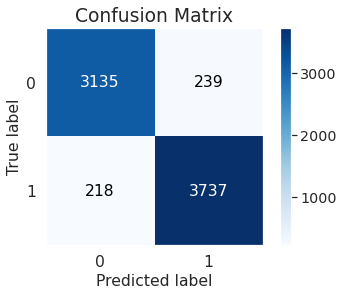

In [52]:
import scikitplot.metrics as skplt
skplt.plot_confusion_matrix(Y_val, predictions)


In [53]:
ur = Y_tr

In [54]:
ur = ur.tolist()

In [55]:
dataset = pd.DataFrame(ur,columns=['col_1'])


In [56]:
dataset

,col_1
0,0
1,0
2,0
3,0
4,0
...,...
17098,1
17099,1
17100,1
17101,1


<AxesSubplot:xlabel='col_1', ylabel='count'>

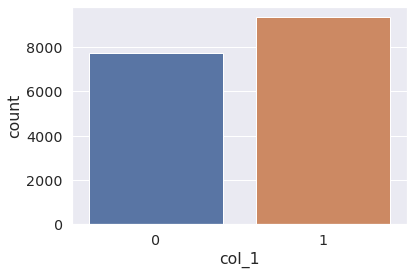

In [57]:
sns.countplot(dataset['col_1'])

In [58]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_tr, Y_tr)

LogisticRegression()

In [59]:
predictions = logmodel.predict(X_val)

In [60]:
from sklearn.metrics import classification_report
print(classification_report(Y_val,predictions))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3374
           1       0.94      0.94      0.94      3955

    accuracy                           0.94      7329
   macro avg       0.94      0.94      0.94      7329
weighted avg       0.94      0.94      0.94      7329



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

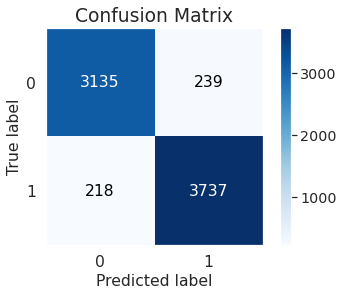

In [61]:
import scikitplot.metrics as skplt
skplt.plot_confusion_matrix(Y_val, predictions)


In [62]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [63]:
#lr_probs = logmodel.predict_proba(Y_val)
#ns_fpr, ns_tpr, _ = roc_curve(Y_val, lr_probs)



In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
dtree = DecisionTreeClassifier()

In [66]:
dtree.fit(X_tr, Y_tr)

DecisionTreeClassifier()

In [67]:
predictions = dtree.predict(X_val)

In [68]:
print(classification_report(Y_val,predictions))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      3374
           1       0.96      0.93      0.94      3955

    accuracy                           0.94      7329
   macro avg       0.94      0.94      0.94      7329
weighted avg       0.94      0.94      0.94      7329



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

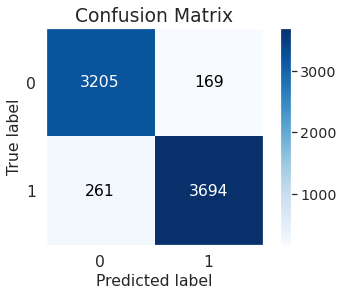

In [69]:
skplt.plot_confusion_matrix(Y_val, predictions)


In [72]:
#X_train.shape

In [73]:
from sklearn.ensemble import RandomForestClassifier


In [74]:
rc = RandomForestClassifier()
rc.fit(X_tr, Y_tr)

RandomForestClassifier()

In [75]:
rcv = rc.predict(X_val)

In [76]:
print(classification_report(Y_val,rcv))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      3374
           1       0.97      0.97      0.97      3955

    accuracy                           0.97      7329
   macro avg       0.97      0.97      0.97      7329
weighted avg       0.97      0.97      0.97      7329



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

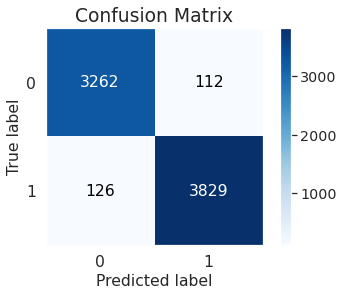

In [77]:
skplt.plot_confusion_matrix(Y_val, rcv)


In [78]:
grdb = GradientBoostingClassifier()

In [79]:
grdb.fit(X_tr, Y_tr)

GradientBoostingClassifier()

In [80]:
prediction = grdb.predict(X_val)

In [81]:
print(classification_report(Y_val,predictions))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      3374
           1       0.96      0.93      0.94      3955

    accuracy                           0.94      7329
   macro avg       0.94      0.94      0.94      7329
weighted avg       0.94      0.94      0.94      7329



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

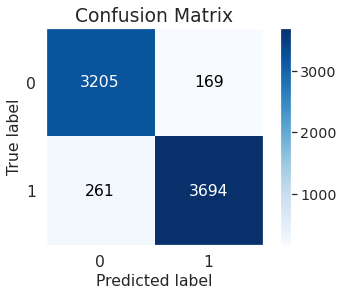

In [82]:
skplt.plot_confusion_matrix(Y_val, predictions)


In [83]:
from sklearn.naive_bayes import MultinomialNB


In [84]:
gnb = GaussianNB()

In [85]:
y_pred = gnb.fit(X_tr, Y_tr).predict(X_val)

In [86]:
print(classification_report(Y_val,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3374
           1       0.94      0.92      0.93      3955

    accuracy                           0.93      7329
   macro avg       0.93      0.93      0.93      7329
weighted avg       0.93      0.93      0.93      7329



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

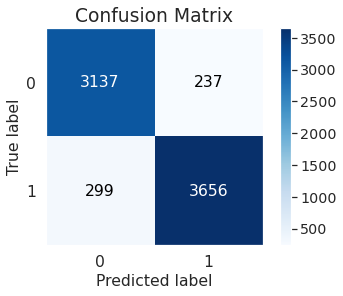

In [87]:
skplt.plot_confusion_matrix(Y_val, y_pred)


In [88]:
#X_final = final_test.drop(columns=['source', 'term_deposit_subscribed', 'id'], axis=1)
#y_final = final_test['term_deposit_subscribed']


In [89]:
#X_final

In [90]:
#y_final

In [91]:
final_prediction = rc.predict(X_test)

In [92]:
X_test

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,job_type_admin.,job_type_blue-collar,job_type_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,prev_campaign_outcome_failure,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
4176,48.0,1548.0,31,44.0,2.0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
22978,53.0,11464.0,5,231.0,1.0,0.0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
10775,44.0,1518.0,20,25.0,4.0,0.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3974,74.0,0.0,27,522.0,1.0,0.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
19838,46.0,313.0,11,247.0,1.0,0.0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9459,27.0,787.0,12,115.0,2.0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2871,38.0,358.0,14,224.0,2.0,0.0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
22136,51.0,628.0,5,136.0,1.0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2654,36.0,692.0,6,128.0,1.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [93]:
X_test.shape

(7855, 49)

In [94]:
X_test.columns

Index(['customer_age', 'balance', 'day_of_month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'job_type_admin.', 'job_type_blue-collar',
       'job_type_entrepreneur', 'job_type_housemaid', 'job_type_management',
       'job_type_retired', 'job_type_self-employed', 'job_type_services',
       'job_type_student', 'job_type_technician', 'job_type_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'default_no', 'default_yes', 'housing_loan_no', 'housing_loan_yes',
       'personal_loan_no', 'personal_loan_yes', 'communication_type_cellular',
       'communication_type_telephone', 'communication_type_unknown',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'prev_campaig

In [95]:
print(classification_report(Y_test,final_prediction))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      7025
           1       0.50      0.75      0.60       830

    accuracy                           0.89      7855
   macro avg       0.73      0.83      0.77      7855
weighted avg       0.92      0.89      0.90      7855



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

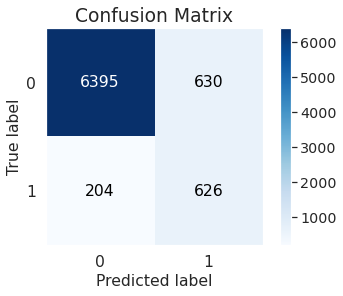

In [96]:
skplt.plot_confusion_matrix(Y_test,final_prediction)


In [97]:
td = pd.read_csv('Test.csv')

In [98]:
td.shape

(13564, 17)

In [99]:
td

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome
0,id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,NaN,0,unknown
1,id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,NaN,0,unknown
2,id_44504,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,NaN,0,unknown
3,id_174,56.0,housemaid,single,unknown,no,6023.0,no,no,unknown,6,jun,34.0,1.0,NaN,0,unknown
4,id_2115,62.0,retired,married,secondary,no,2913.0,no,no,cellular,12,apr,127.0,1.0,188.0,1,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,id_42406,29.0,management,single,tertiary,no,717.0,yes,no,cellular,15,jun,94.0,1.0,NaN,0,unknown
13560,id_14483,NaN,blue-collar,married,secondary,no,604.0,yes,no,telephone,10,jul,155.0,1.0,NaN,0,unknown
13561,id_43066,45.0,blue-collar,married,primary,no,237.0,yes,no,unknown,16,may,231.0,4.0,NaN,0,unknown
13562,id_18375,52.0,admin.,married,primary,no,241.0,yes,no,cellular,13,may,243.0,2.0,299.0,5,failure


In [100]:
tdf = td.fillna(0)

In [101]:
tdf.isnull().sum()

id                                  0
customer_age                        0
job_type                            0
marital                             0
education                           0
default                             0
balance                             0
housing_loan                        0
personal_loan                       0
communication_type                  0
day_of_month                        0
month                               0
last_contact_duration               0
num_contacts_in_campaign            0
days_since_prev_campaign_contact    0
num_contacts_prev_campaign          0
prev_campaign_outcome               0
dtype: int64

In [102]:
tdfl = pd.get_dummies(tdf, columns=cat_cols)


In [103]:
tdfl.shape

(13564, 54)

In [104]:
tdfl.columns

Index(['id', 'customer_age', 'balance', 'day_of_month',
       'last_contact_duration', 'num_contacts_in_campaign',
       'days_since_prev_campaign_contact', 'num_contacts_prev_campaign',
       'job_type_admin.', 'job_type_blue-collar', 'job_type_entrepreneur',
       'job_type_housemaid', 'job_type_management', 'job_type_retired',
       'job_type_self-employed', 'job_type_services', 'job_type_student',
       'job_type_technician', 'job_type_unemployed', 'job_type_unknown',
       'marital_0', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_loan_no',
       'housing_loan_yes', 'personal_loan_0', 'personal_loan_no',
       'personal_loan_yes', 'communication_type_cellular',
       'communication_type_telephone', 'communication_type_unknown',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'mont

In [105]:
tdfl.drop(['id'],axis=1,inplace = True)

In [106]:
tdfl

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,job_type_admin.,job_type_blue-collar,job_type_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,prev_campaign_outcome_failure,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
0,55.0,7136.0,13,90.0,2.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,24.0,179.0,18,63.0,2.0,0.0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,46.0,143.0,8,208.0,1.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,56.0,6023.0,6,34.0,1.0,0.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,62.0,2913.0,12,127.0,1.0,188.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,29.0,717.0,15,94.0,1.0,0.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
13560,0.0,604.0,10,155.0,1.0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
13561,45.0,237.0,16,231.0,4.0,0.0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
13562,52.0,241.0,13,243.0,2.0,299.0,5,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [107]:
tdfl.shape

(13564, 53)

In [108]:
tdfl.drop(['marital_0','education_unknown','personal_loan_0'],axis=1,inplace = True)

In [109]:
tdfl.columns

Index(['customer_age', 'balance', 'day_of_month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'job_type_admin.', 'job_type_blue-collar',
       'job_type_entrepreneur', 'job_type_housemaid', 'job_type_management',
       'job_type_retired', 'job_type_self-employed', 'job_type_services',
       'job_type_student', 'job_type_technician', 'job_type_unemployed',
       'job_type_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'default_no', 'default_yes', 'housing_loan_no',
       'housing_loan_yes', 'personal_loan_no', 'personal_loan_yes',
       'communication_type_cellular', 'communication_type_telephone',
       'communication_type_unknown', 'month_apr', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month

In [110]:
tdfl.drop(['job_type_unknown'],axis=1,inplace = True)

In [111]:
tdfl.shape

(13564, 49)

In [112]:
final_prediction = rc.predict(tdfl)

In [113]:
final_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [114]:
#from sklearn.model_selection import RandomizedSearchCV

#hyperparam_combs = {
#    'n_estimators': [10, 20, 50, 100, 200],
#    'learning_rate': [0.1, 0.5, 0.01, 0.05, 0.005],
#    'min_samples_split': [2, 10, 20, 30, 40],
#    'min_samples_leaf': [1, 2, 3, 4, 5],
#    'max_depth': [2,3,5,8,10,20],
#    'max_leaf_nodes': [8, 16, 32, 64, 128,256]
#}

#clf = RandomizedSearchCV(GradientBoostingClassifier(),
#                         hyperparam_combs,
#                         scoring='f1',
#                         random_state=1,
#                         n_iter=20)

#search = clf.fit(X, y)

#search.best_params_

In [115]:
ans = final_prediction.tolist()

In [116]:
ans

[0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [117]:
ans_df = pd.DataFrame(ans)

In [118]:
ans_df

,0
0,0
1,0
2,0
3,0
4,1
...,...
13559,0
13560,0
13561,0
13562,0


In [119]:
ans_df.rename(columns={0: "Lead_value"},inplace = True)


In [120]:
ans_df

,Lead_value
0,0
1,0
2,0
3,0
4,1
...,...
13559,0
13560,0
13561,0
13562,0


In [121]:
td['lead_value'] = ans_df['Lead_value']

In [122]:
td

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,lead_value
0,id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,NaN,0,unknown,0
1,id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,NaN,0,unknown,0
2,id_44504,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,NaN,0,unknown,0
3,id_174,56.0,housemaid,single,unknown,no,6023.0,no,no,unknown,6,jun,34.0,1.0,NaN,0,unknown,0
4,id_2115,62.0,retired,married,secondary,no,2913.0,no,no,cellular,12,apr,127.0,1.0,188.0,1,success,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,id_42406,29.0,management,single,tertiary,no,717.0,yes,no,cellular,15,jun,94.0,1.0,NaN,0,unknown,0
13560,id_14483,NaN,blue-collar,married,secondary,no,604.0,yes,no,telephone,10,jul,155.0,1.0,NaN,0,unknown,0
13561,id_43066,45.0,blue-collar,married,primary,no,237.0,yes,no,unknown,16,may,231.0,4.0,NaN,0,unknown,0
13562,id_18375,52.0,admin.,married,primary,no,241.0,yes,no,cellular,13,may,243.0,2.0,299.0,5,failure,0


In [123]:
td.to_csv('Lead Data.csv', index=False)


In [124]:
ans_df.to_csv('lead.csv', index=False)


In [126]:
ans_df

,Lead_value
0,0
1,0
2,0
3,0
4,1
...,...
13559,0
13560,0
13561,0
13562,0


<AxesSubplot:xlabel='Lead_value', ylabel='count'>

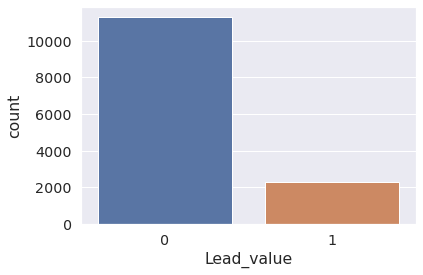

In [127]:
sns.countplot(ans_df['Lead_value'])

In [130]:
predicted_df = pd.read_csv('Lead Data.csv')

In [131]:
predicted_df


,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,lead_value
0,id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,NaN,0,unknown,0
1,id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,NaN,0,unknown,0
2,id_44504,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,NaN,0,unknown,0
3,id_174,56.0,housemaid,single,unknown,no,6023.0,no,no,unknown,6,jun,34.0,1.0,NaN,0,unknown,0
4,id_2115,62.0,retired,married,secondary,no,2913.0,no,no,cellular,12,apr,127.0,1.0,188.0,1,success,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,id_42406,29.0,management,single,tertiary,no,717.0,yes,no,cellular,15,jun,94.0,1.0,NaN,0,unknown,0
13560,id_14483,NaN,blue-collar,married,secondary,no,604.0,yes,no,telephone,10,jul,155.0,1.0,NaN,0,unknown,0
13561,id_43066,45.0,blue-collar,married,primary,no,237.0,yes,no,unknown,16,may,231.0,4.0,NaN,0,unknown,0
13562,id_18375,52.0,admin.,married,primary,no,241.0,yes,no,cellular,13,may,243.0,2.0,299.0,5,failure,0


In [132]:
lead_customers = predicted_df[predicted_df['lead_value'] == 1]


In [134]:
lead_customers.shape

(2276, 18)

In [135]:
lead_customers.to_csv('Lead Customers.csv', index=False)
